# Pérdida anual de bosque nativo por región forestal en porcentaje
Muestra la pérdida anual de bosque nativo en las regiones forestales por año o período en porcentaje
https://datos.gob.ar/dataset/ambiente-estado-bosque-nativo/archivo/ambiente_16.4

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
deforestacion = pd.read_csv("..//data//raw//perdida-anual-bosque-nativo-X-region-forestal-2020.csv",
                           sep=";")
deforestacion

,período,yungas,parque_chaqueño,espinal,selva_paranaense,bosque_andino_patagónico,monte
0,1998-2002,0.33,0.61,0.53,1.48,NaN,NaN
1,2003-2006,0.35,0.90,0.21,1.41,NaN,NaN
2,2007,0.37,1.09,0.51,0.76,NaN,NaN
3,2008-2011,0.19,0.93,0.42,0.48,NaN,NaN
4,2012-2013,0.15,0.86,0.25,0.19,NaN,NaN
5,2014,0.10,0.42,0.22,0.06,0.34,NaN
6,2015,0.04,0.41,0.21,0.08,0.34,NaN
7,2016,0.01,0.45,0.14,0.08,0.34,0.12
8,2017,0.04,0.42,0.40,0.26,0.34,0.16
9,2018,0.02,0.38,0.82,0.12,0.01,0.38


In [4]:
deforest = deforestacion.melt(id_vars = ["período"], var_name="bosque_nativo", value_name="perdida")
deforest

,período,bosque_nativo,perdida
0,1998-2002,yungas,0.33
1,2003-2006,yungas,0.35
2,2007,yungas,0.37
3,2008-2011,yungas,0.19
4,2012-2013,yungas,0.15
...,...,...,...
85,2019,monte,0.23
86,2020,monte,0.13
87,2021,monte,0.38
88,2022,monte,0.14


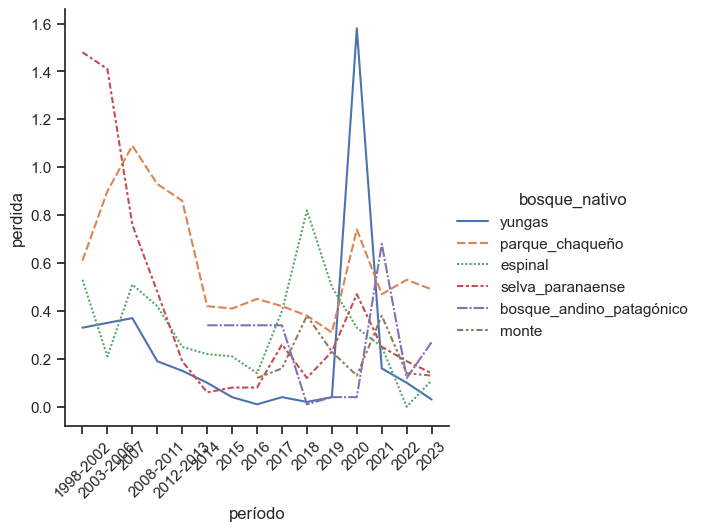

In [25]:
sns.set_theme(style="ticks")
sns.relplot(
    data=deforest, kind="line",
    x="período", y="perdida"
    #, col="align"
    ,hue="bosque_nativo"
    #, size="coherence"
    , style="bosque_nativo"
    #facet_kws=dict(sharex=False)
    
)
plt.xticks(rotation=45)
plt.show()

---
# Cantidad de incendios reportados por mes
Se muestran la cantidad de incendios reportados en el período considerado
https://datos.gob.ar/dataset/ambiente-incendios-forestales/archivo/ambiente_35.4

In [48]:
incendios_mes = pd.read_csv("..//data//raw//cantidad-incendios-mes-2017-2025.csv",
                           sep=";")
incendios_mes

,mes,año_2017,año_2018,año_2019,año_2020,año_2021,año_2022,año_2023,año_2024,año_2025
0,Total,895,1193,1503,1743,2339,2657,2217,2735,206.0
1,Enero,183,168,125,125,79,176,253,109,114.0
2,Febrero,71,134,119,83,58,133,122,340,88.0
3,Marzo,17,75,58,177,74,33,95,380,4.0
4,Abril,2,23,20,75,19,54,22,178,NaN
5,Mayo,4,5,10,92,17,51,19,48,NaN
6,Junio,15,32,73,100,29,133,36,69,NaN
7,Julio,31,93,162,242,375,409,118,315,NaN
8,Agosto,155,280,388,286,780,464,464,541,NaN
9,Septiembre,109,194,204,191,403,496,360,467,NaN


In [50]:
# Coloco el mes como mi nuevo indice
incendio_new_index = incendios_mes.set_index("mes")
incendio_mes_heatmap = incendio_new_index.drop("Total")
incendio_mes_heatmap 

,año_2017,año_2018,año_2019,año_2020,año_2021,año_2022,año_2023,año_2024,año_2025
mes,,,,,,,,,
Enero,183,168,125,125,79,176,253,109,114.0
Febrero,71,134,119,83,58,133,122,340,88.0
Marzo,17,75,58,177,74,33,95,380,4.0
Abril,2,23,20,75,19,54,22,178,NaN
Mayo,4,5,10,92,17,51,19,48,NaN
Junio,15,32,73,100,29,133,36,69,NaN
Julio,31,93,162,242,375,409,118,315,NaN
Agosto,155,280,388,286,780,464,464,541,NaN
Septiembre,109,194,204,191,403,496,360,467,NaN


<Axes: ylabel='mes'>

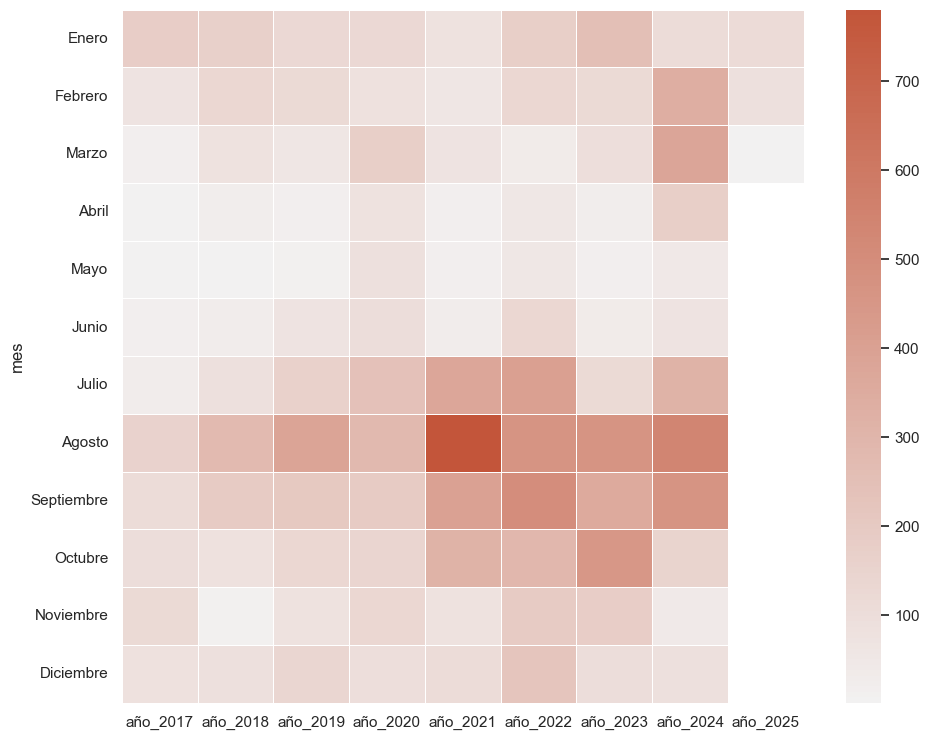

In [55]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(incendio_mes_heatmap
            , cmap=cmap
            # , vmax=.3
            , center=0
            # ,square=True
            , linewidths=.5
            # , cbar_kws={"shrink": .5}
           )

---
# Presupuesto
## Presupuesto asignado al Fondo Nacional para el Enriquecimiento y Conservación de los Bosques Nativos
Muestra el presupuesto asignado al Fondo Nacional para el Enriquecimiento y Conservación de los Bosques Nativos por año en millones de pesos
https://datos.gob.ar/dataset/ambiente-conservacion-manejo-bosques-nativos/archivo/ambiente_19.6

In [56]:
presupuesto_hasta_2023 = pd.read_csv("..//data//raw//presupuesto-millones-pesos-2023.csv",
                           sep=";")
presupuesto_hasta_2023

,año,millones_de_pesos
0,2010,300
1,2011,300
2,2012,300
3,2013,253
4,2014,247
5,2015,246
6,2016,265
7,2017,557
8,2018,571
9,2019,571


<Figure size 2000x600 with 0 Axes>

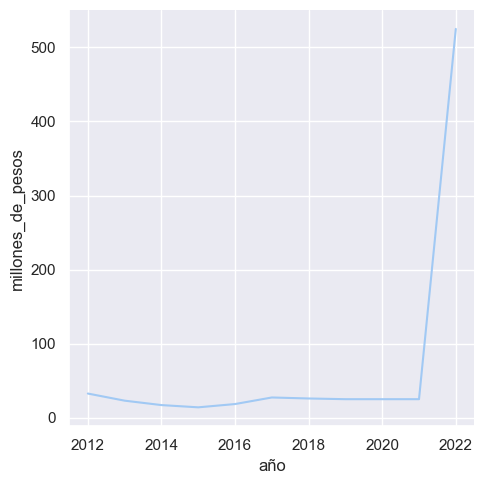

In [74]:
sns.set_theme(palette="pastel")

# Set up the matplotlib figure
plt.figure(figsize=(20, 6))

sns.relplot(
    data=presupuesto_hasta_2023, x="año", y="millones_de_pesos"
    # , col="region"
    # ,hue="event"
    # , style="event"
    , kind="line"
)

plt.show()

## Partidas presupuestarias asignadas al Programa Nacional de Protección de los Bosques Nativos
https://ciam.ambiente.gob.ar/repositorio.php?tid=5&stid=19&did=177#

In [69]:
partida_hasta_2022 = pd.read_csv("..//data//raw//partida-presupuesto-proteccion-bosques-millpesos.csv",
                           sep=";")
partida_hasta_2022

,año,millones_de_pesos
0,2012,32.62
1,2013,23.00
2,2014,17.04
3,2015,14.00
4,2016,18.43
5,2017,27.30
6,2018,25.94
7,2019,25.00
8,2020,25.00
9,2021,25.00


<Figure size 2000x600 with 0 Axes>

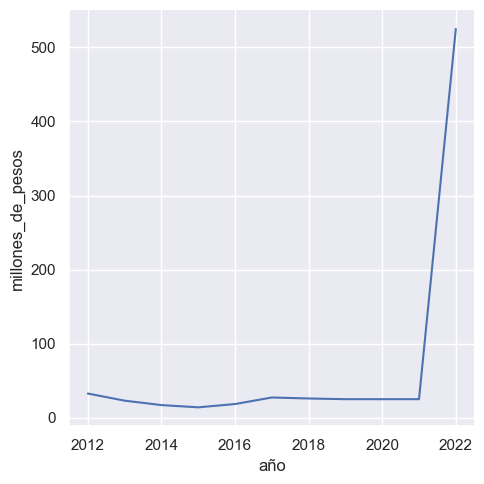

In [72]:
sns.set_theme()

# Set up the matplotlib figure
plt.figure(figsize=(20, 6))

sns.relplot(
    data=partida_hasta_2022, x="año", y="millones_de_pesos"
    # , col="region"
    # ,hue="event"
    # , style="event"
    , kind="line"
)

plt.show()